In [1]:
%matplotlib inline


# A demo of structured Ward hierarchical clustering on a raccoon face image


Compute the segmentation of a 2D image with Ward hierarchical
clustering. The clustering is spatially constrained in order
for each segmented region to be in one piece.


In [2]:
# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause

print(__doc__)

import time as time

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version

if sp_version < (0, 12):
    raise SkipTest("Skipping because SciPy version earlier than 0.12.0 and "
                   "thus does not include the scipy.misc.face() image.")

Automatically created module for IPython interactive environment


Generate data


In [3]:
try:
    face = sp.face(gray=True)
except AttributeError:
    # Newer versions of scipy have face in misc
    from scipy import misc
    face = misc.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

X = np.reshape(face, (-1, 1))

Define the structure A of the data. Pixels connected to their neighbors.


In [4]:
connectivity = grid_to_graph(*face.shape)

Compute clustering


In [5]:
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, face.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Compute structured hierarchical clustering...
('Elapsed time: ', 0.9690001010894775)
('Number of pixels: ', 7752)
('Number of clusters: ', 15)


Plot the results on an image


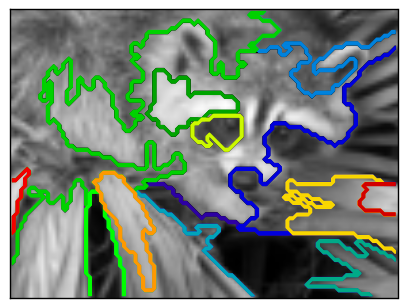

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

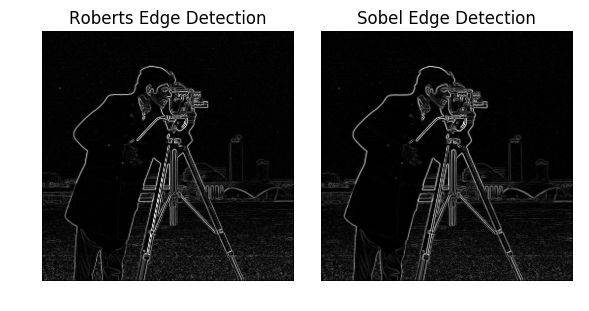

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt


image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

ax0.imshow(edge_roberts, cmap=plt.cm.gray)
ax0.set_title('Roberts Edge Detection')
ax0.axis('off')

ax1.imshow(edge_sobel, cmap=plt.cm.gray)
ax1.set_title('Sobel Edge Detection')
ax1.axis('off')

plt.tight_layout()